<a href="https://colab.research.google.com/github/carlibeisel/Drains_Lower_Boise_River/blob/main/*water_rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Rights in the Treasure Valley

By: Carli Beisel


Created on August 2024


Purpose:

1) Crop Water Rights layer to drainshds in the Treasure Valley and also create a separate file that organizes all WR based on priorty year + surface/groundwater.


2) Create a figure showing the difference between surface + groundwater rights.

3) Create a figure showing change in water rights over time based on priorty date.

## 1. Organize IDWR Water Right Data from GIS Data Hub

Separate based on surface/groundwater rights and organize based on priority year.  

In [1]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ----------------------------------- #
#         Crop to the LBRB            #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
lbrb = gpd.read_file('/content/drive/MyDrive/Data/GIS Shapefiles/LBRB_shp/LBRB_file.shp')

lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')

lbrb_water_rights.to_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_lbrb_masked/lbrb_water_rights.shp')

<ipython-input-49-8ea92cc00dca>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:8826
Right CRS: EPSG:4326

  lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
# ----------------------------------- #
#       Convert .SHP to .CSV          #
# ----------------------------------- #
lbrb_water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights/lbrb_water_rights.shp')

wr = pd.DataFrame(water_rights.drop(columns='geometry'))
wr.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv', index=False)


In [2]:
# ----------------------------------- #
#       Crop WR to Drainsheds         #
# ----------------------------------- #

#not doing this properly . . . . WHY!

water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
drainsheds = gpd.read_file('/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_Merge_07072022.shp')
names = drainsheds['Name']
output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'

# Create function to crop water rights to each drainshed area
def crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir):
    mask_gdf = drainsheds
    for i, mask_feature in mask_gdf.iterrows():
        mask_geom = mask_feature['geometry']
        mask_name = mask_feature['Name']

        cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')

        output_filename = os.path.join(output_dir, f"{mask_name}_wr.shp")

        # Save the cropped shapefile
        cropped_gdf.to_file(output_filename)
        print(f"Cropped shapefile saved to {output_filename}")

crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir)


TypeError: overlay() missing 1 required positional argument: 'df2'

In [ ]:
# ----------------------------------- #
#   Convert Drain WR to CSV File      #
# ----------------------------------- #

shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.shp')

csv_output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'

for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    base_name = os.path.basename(shapefile)
    csv_filename = os.path.splitext(base_name)[0] + '.csv'
    csv_filepath = os.path.join(csv_output_dir, csv_filename)
    gdf.to_csv(csv_filepath, index=False)
    print(f"Converted {shapefile} to {csv_filepath}")

Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley_wr.csv
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.csv
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.csv
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.csv
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Creek_wr.shp to /content/drive/MyDrive/Data

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Conway Gulch_wr.csv')
file

,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,...,LargePOU,RightID,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,SHAPE_STAr,SHAPE_STLe,geometry


In [ ]:
# ------------------------ #
#   Merge into one DF      #
# ------------------------ #

## 2. Create a figure showing the difference between surface and groundwater rights in the Treasure Valley.

<ipython-input-59-5063505e535c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


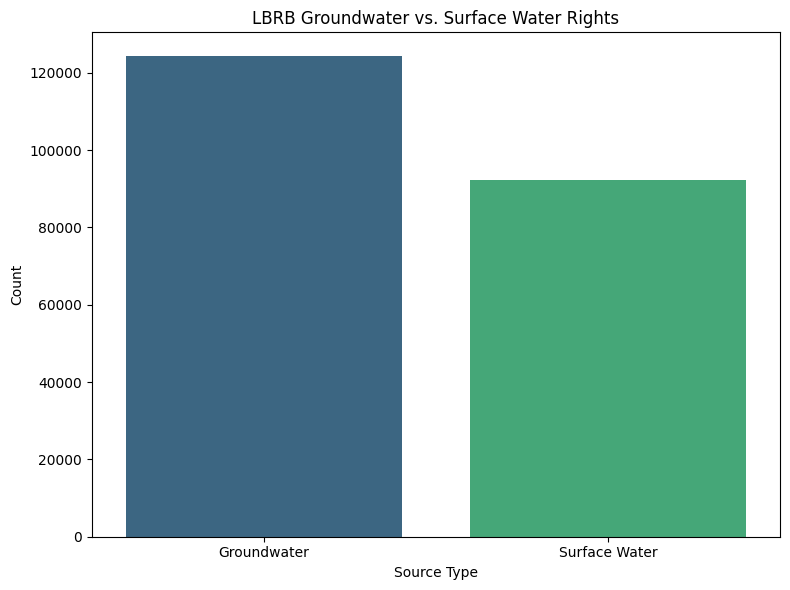

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (bar)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' column is in the expected format
data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('LBRB Groundwater vs. Surface Water Rights')
plt.xlabel('Source Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


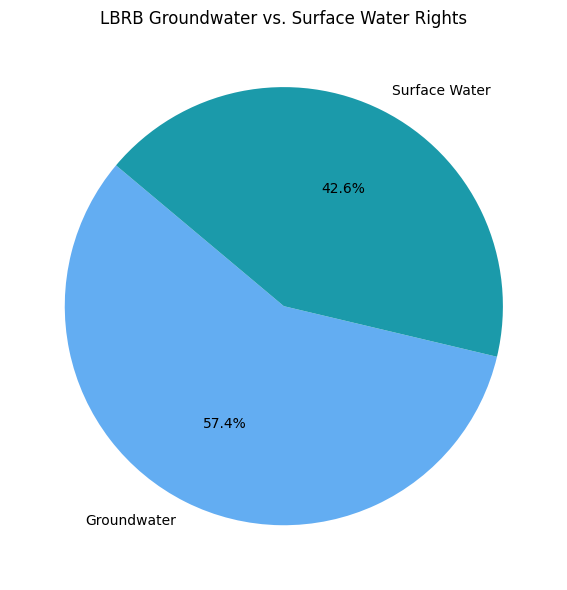

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (pie)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#63ADF2', '#1B9AAA'])
plt.title('LBRB Groundwater vs. Surface Water Rights')

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------- #
#      SW/GW Comparison in the TV     #
# ----------------------------------- #

#violin plot of all drainages

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' column is in the expected format
data['Source'] = data['Source'].astype(str)

# Convert the PriorityDa column to datetime format
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')

# Extract the year from the PriorityDa column
data['PriorityYear'] = data['PriorityDa'].dt.year

# Define the source and PriorityYear columns for plotting
source = data['Source']
year = data['PriorityYear']

# Create a figure and axes for subplots
fig, axx = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot
sns.violinplot(x=source, y=year, ax=axx[0], palette='muted')
axx[0].set_title('Distribution of Years by Water Source')
axx[0].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

# Box plot
sns.boxplot(x=source, y=year, ax=axx[1], palette='muted')
axx[1].set_title('Box Plot of Years by Water Source')
axx[1].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds    #
# ----------------------------------- #

#violin plot of all drainages

## 3. Create a figure showing change in water rights over time based on priorty date.

<ipython-input-53-dc834b5a7af6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=data, palette='viridis', ax=ax)


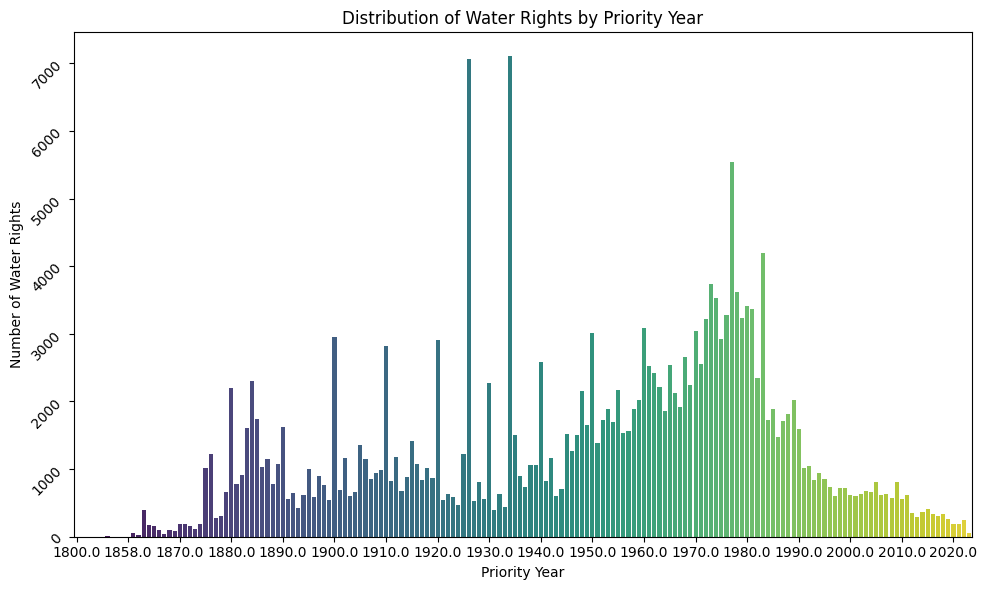

In [ ]:
# ----------------------------------- #
#       Figure for All of TV
#          (priority year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='PriorityYear', data=data, palette='viridis', ax=ax)

# Limit x-axis ticks to a desired number
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number within MaxNLocator

plt.title('Distribution of Water Rights by Priority Year')
plt.xlabel('Priority Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data

,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,...,WaterDistr,LargePOU,RightID,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,SHAPE_STAr,SHAPE_STLe
0,33-10900,33,10900,NaN,Active,1934-06-28,2001-10-11,UNITED STATES OF AMERICA ACTING THROUGH,STOCKWATER,4,...,33,0,222600,2,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,8.321867e+06,54110.179685
1,57-10609,57,10609,NaN,Active,1941-07-01,1996-11-15,LACHELLE WOOD,STOCKWATER,4,...,NWD,0,361130,7,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.606101e+05,1603.130592
2,63-30274,63,30274,NaN,Active,1988-08-31,2000-05-26,MARY ANN HOFMANN,DOMESTIC,43,...,TBD,0,376520,9,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,6.517807e+02,103.728258
3,36-12737,36,12737,NaN,Active,1958-12-31,1998-05-19,HERBERT W POTEET,DOMESTIC,43,...,EXC,0,362295,12,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.613989e+05,1607.194301
4,36-12736,36,12736,NaN,Active,1958-12-31,1998-03-20,HERBERT W POTEET,DOMESTIC,43,...,EXC,0,362294,15,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.601180e+05,1600.619718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216453,37-22459,37,22459,NaN,Active,2010-01-19,NaN,HEART ROCK RANCH LLC,RECREATION STORAGE,47,...,37,0,717448,882086,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,T,4.654030e+05,40432.317983
216454,37-22459,37,22459,NaN,Active,2010-01-19,NaN,HEART ROCK RANCH LLC,AESTHETIC STORAGE,53,...,37,0,717448,882087,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,T,4.654030e+05,40432.317983
216455,37-23393,37,23393,NaN,Active,1883-03-24,2011-08-30,ECCLES WINDOW ROCK RANCH LLC,MITIGATION,73,...,37,0,717710,882488,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,2.411708e+06,21359.252912
216456,65-23657,65,23657,NaN,Active,2016-05-23,NaN,LONG VALLEY PRESERVATION SOCIETY,IRRIGATION,1,...,EXC,0,717994,882882,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.152250e+04,1335.483300


<ipython-input-7-7a9c545ee946>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=data, palette='viridis', ax=ax)


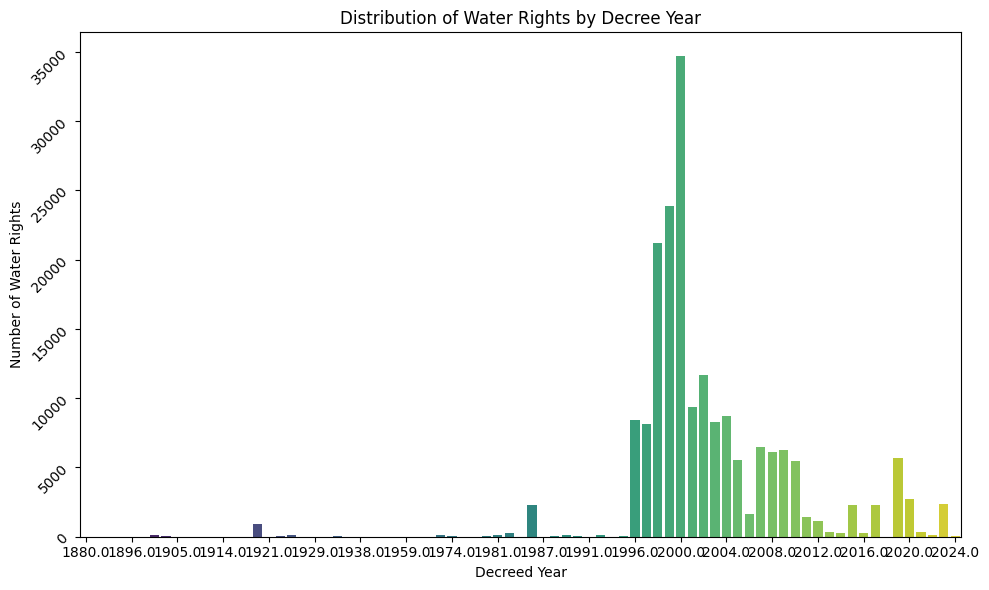

In [7]:
# ----------------------------------- #
#       Figure for All of TV
#          (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='DecreedYear', data=data, palette='viridis', ax=ax)

# Limit x-axis ticks to a desired number
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number within MaxNLocator

plt.title('Distribution of Water Rights by Decree Year')
plt.xlabel('Decreed Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-57-a1b5131091d2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=groundwater_data, palette='viridis', ax=axes[0])
<ipython-input-57-a1b5131091d2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=other_data, palette='viridis', ax=axes[1])


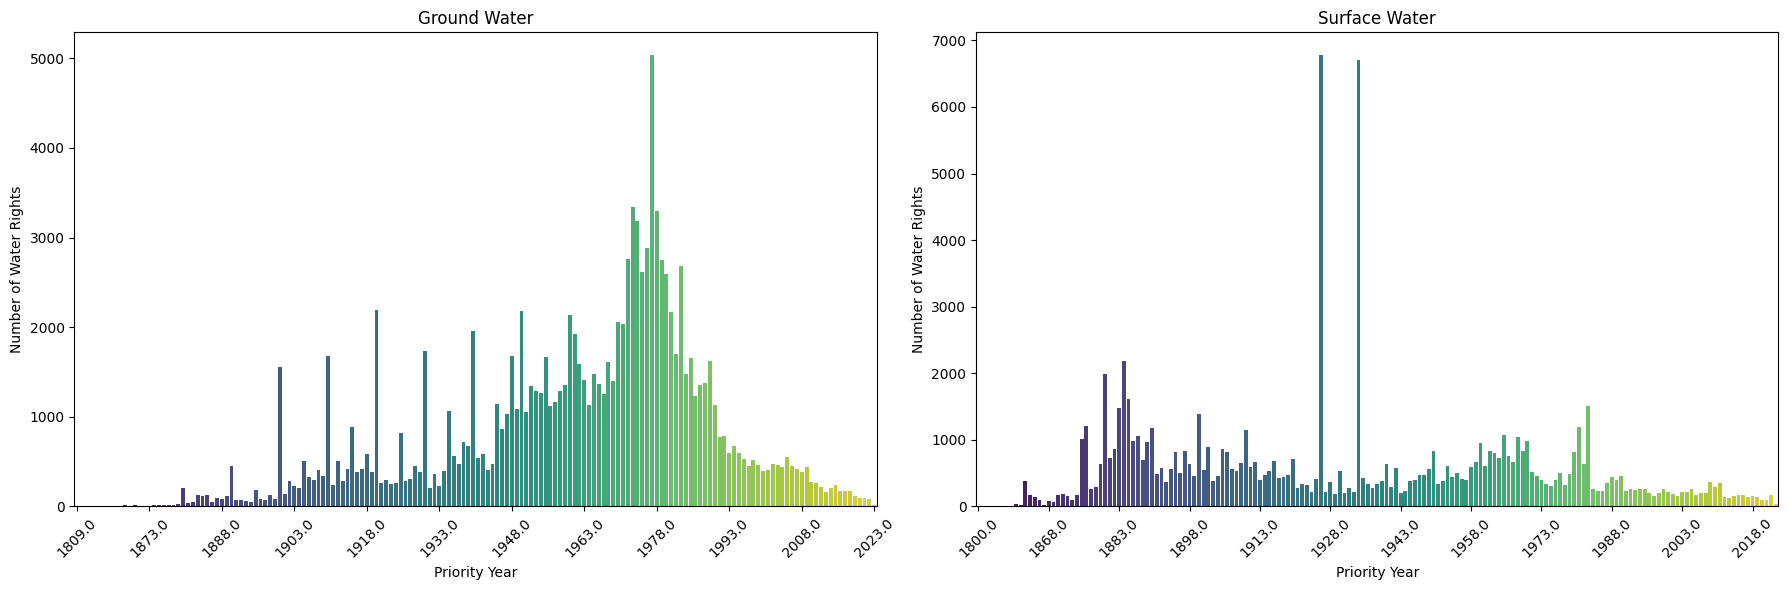

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (priority year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year


groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for GW
sns.countplot(x='PriorityYear', data=groundwater_data, palette='viridis', ax=axes[0])
axes[0].set_title('Ground Water')
axes[0].set_xlabel('Priority Year')
axes[0].set_ylabel('Number of Water Rights')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[0].tick_params(axis='x', rotation=45)

# Plot for SW
sns.countplot(x='PriorityYear', data=other_data, palette='viridis', ax=axes[1])
axes[1].set_title('Surface Water')
axes[1].set_xlabel('Priority Year')
axes[1].set_ylabel('Number of Water Rights')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-8-31fe1757eaff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=groundwater_data, palette='viridis', ax=axes[0])
<ipython-input-8-31fe1757eaff>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=other_data, palette='viridis', ax=axes[1])


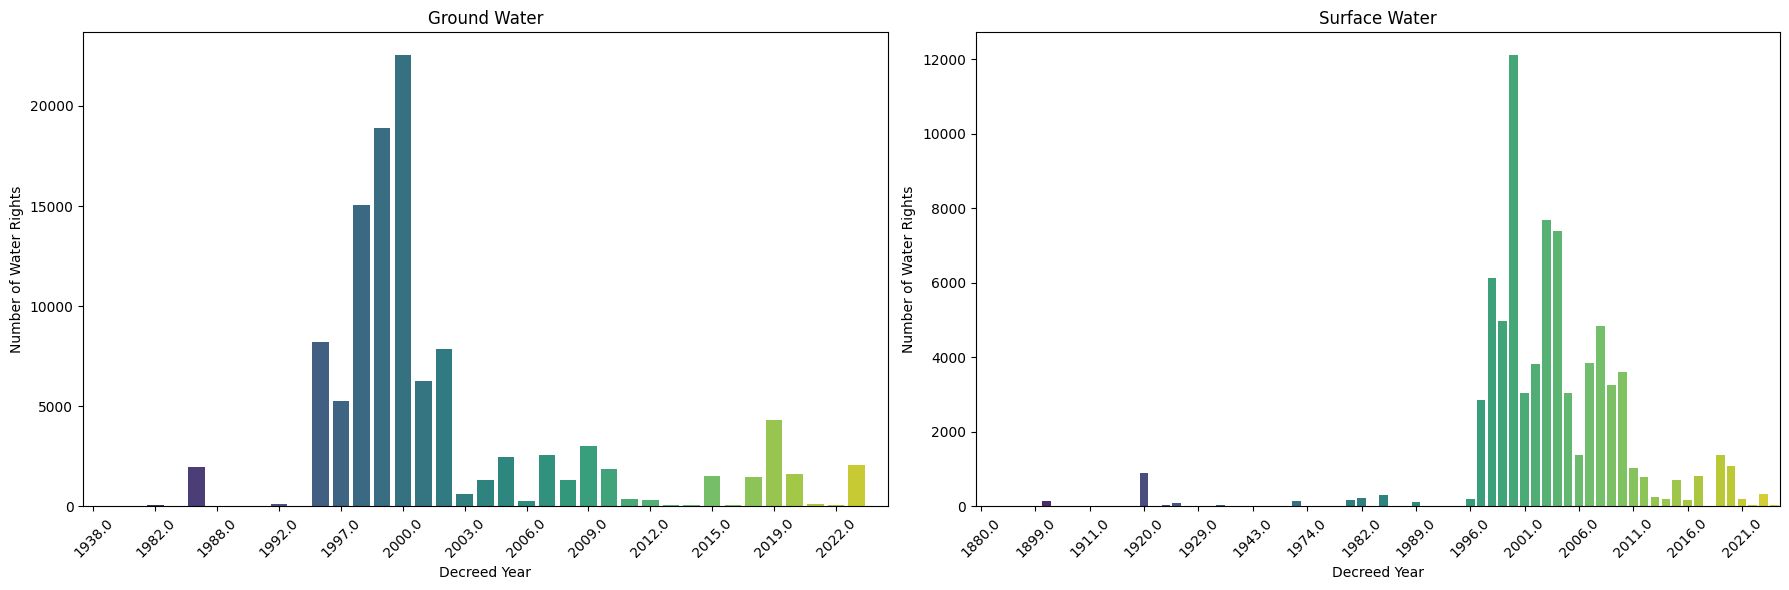

In [8]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year


groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for GW
sns.countplot(x='DecreedYear', data=groundwater_data, palette='viridis', ax=axes[0])
axes[0].set_title('Ground Water')
axes[0].set_xlabel('Decreed Year')
axes[0].set_ylabel('Number of Water Rights')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[0].tick_params(axis='x', rotation=45)

# Plot for SW
sns.countplot(x='DecreedYear', data=other_data, palette='viridis', ax=axes[1])
axes[1].set_title('Surface Water')
axes[1].set_xlabel('Decreed Year')
axes[1].set_ylabel('Number of Water Rights')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

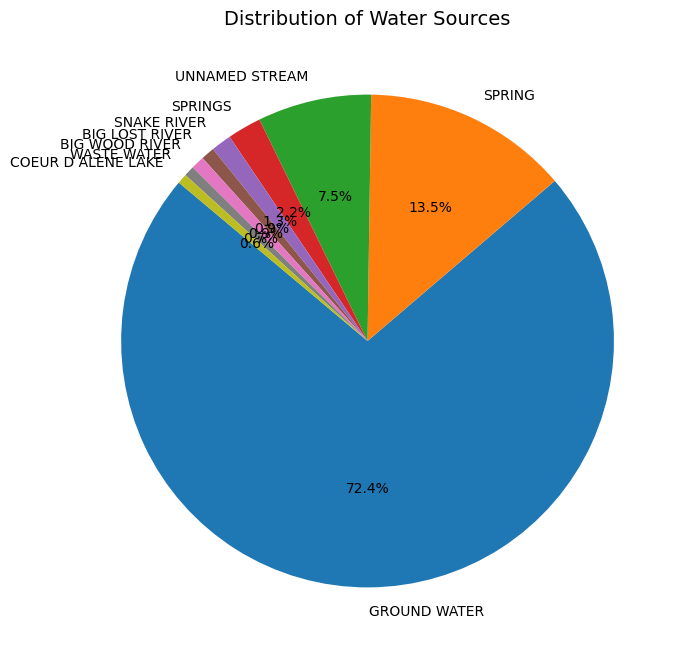

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (pie)   #
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' is treated as a string
data['Source'] = data['Source'].astype(str)

# Count occurrences of each source
counts = data['Source'].value_counts()

# Calculate total count
total_count = counts.sum()

# Filter out sources with less than 0.5% of the total
filtered_counts = counts[counts / total_count >= 0.005]

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Water Sources', fontsize=14)
plt.setp(plt.gca().texts, fontsize=10)  # Adjust text size as needed
plt.show()

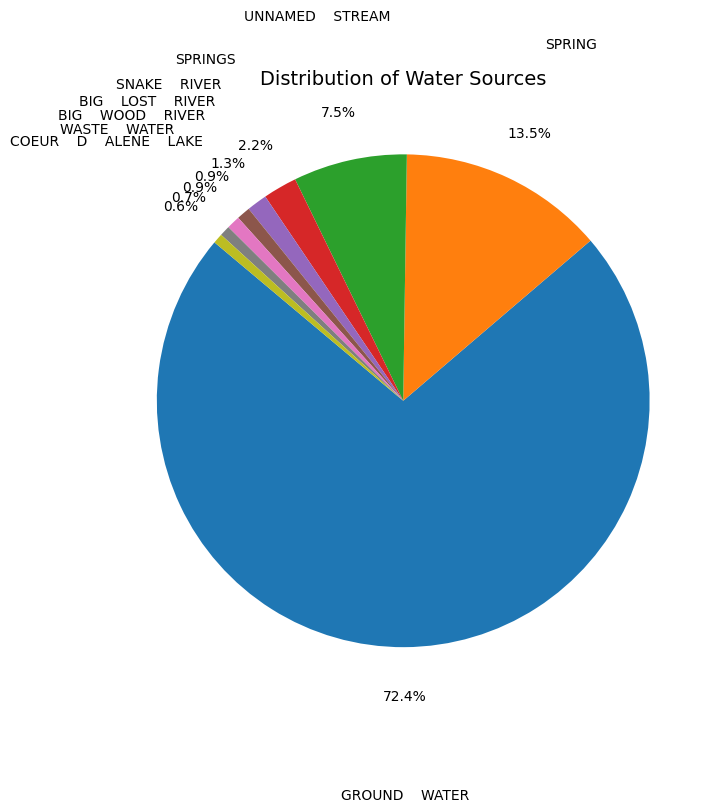

In [ ]:
# Read data
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' is treated as a string
data['Source'] = data['Source'].astype(str)

# Count occurrences of each source
counts = data['Source'].value_counts()

# Calculate total count
total_count = counts.sum()

# Filter out sources with less than 0.5% of the total
filtered_counts = counts[counts / total_count >= 0.005]

# Define function to format percentages
def format_percentages(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

# Plot the data
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    filtered_counts,
    labels=filtered_counts.index,
    autopct=lambda pct: format_percentages(pct, filtered_counts),
    startangle=140,
    pctdistance=1.2,  # Move percentage labels outside the pie chart
    labeldistance=1.6  # Increase the distance of labels from the center
)

# Customize the text appearance
for text in texts:
    text.set_horizontalalignment('center')  # Center-align the text
    text.set_fontsize(10)  # Adjust font size
    # Add more space between words
    text.set_text('    '.join(text.get_text().split()))  # Increase space between words

# Customize the percentage labels
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title('Distribution of Water Sources', fontsize=14)
plt.show()


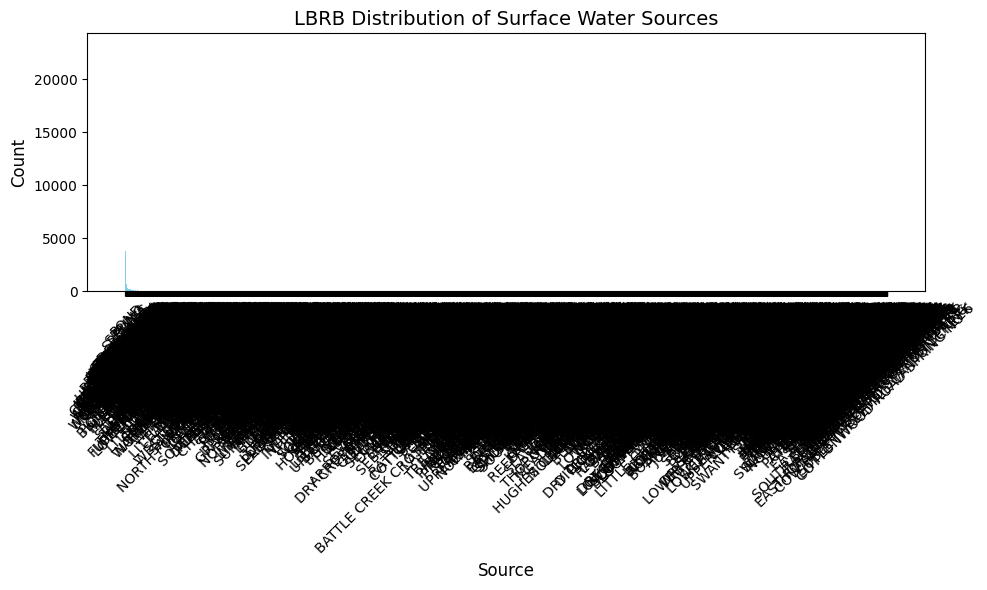

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (bar)
#              excluding GW
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)

# Filter out 'GROUND WATER' entries
filtered_data = data[data['Source'] != 'GROUND WATER']

# Count occurrences of each source, excluding 'GROUND WATER'
counts = filtered_data['Source'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts, color='skyblue')
plt.title('LBRB Distribution of Surface Water Sources', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

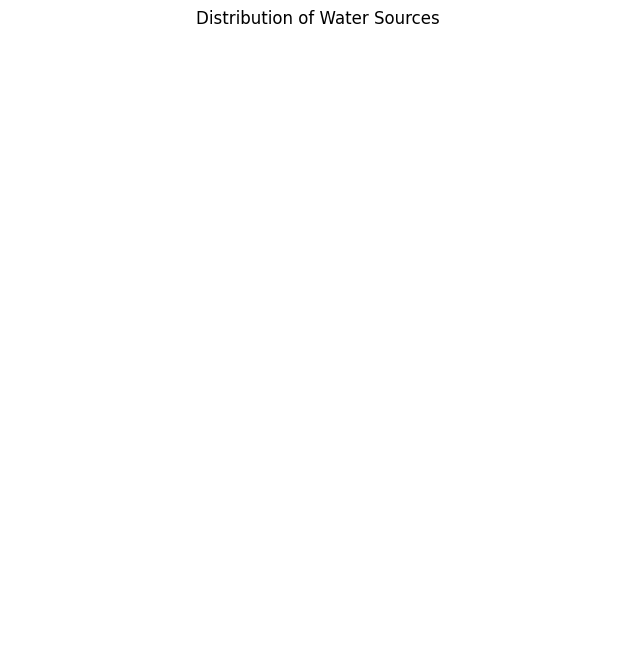

In [ ]:
# ----------------------------------- #
#  Water Sources for each Drainshed   #
# ----------------------------------- #
csv_files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.csv')

all_data = pd.DataFrame()

for file in csv_files:
    data = pd.read_csv(file)
    all_data = pd.concat([all_data, data], ignore_index=True)

all_data['Source'] = all_data['Source'].astype(str)

source_counts = all_data['Source'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Water Sources')
plt.show()